In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from weatherinszeged', con=engine)
engine.dispose()

In [10]:
data.head()
# data.info()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
target = data['temperature']
features = data[['humidity', 'windspeed', 'windbearing', 'pressure']]

lrm = linear_model.LinearRegression()

lrm.fit(features, target)

print(lrm.coef_)
print(lrm.intercept_)

[-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
37.9264381852854


In [12]:
# Assumption two: the error term should zero on average

predictions = lrm.predict(features)
errors = target - predictions
mean_error = errors.mean()
mean_error

# the mean_error is effectively 0

-6.282637831541205e-15

BartlettResult(statistic=2464.8446568674854, pvalue=0.0)
LeveneResult(statistic=2321.2401008573806, pvalue=0.0)


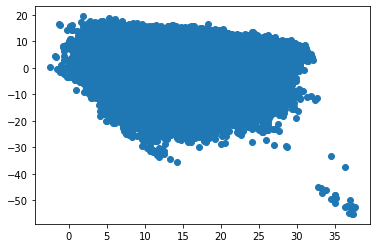

In [14]:
#  homoscedasticity

plt.scatter(predictions, errors)

# the errors variance definitely changes across observations

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)
print(bart_stats)
print(lev_stats)

# both bartlett and levene test showed a pvalue less than 0.05, which indicate a heteroscedastic of the errors distribution

#  this may due to outliers or missing important variables

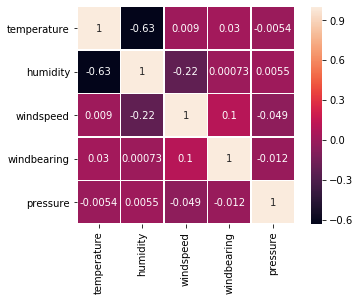

In [24]:
# Assumption 4: low multicollinearity
df = data[['temperature','humidity', 'windspeed', 'windbearing', 'pressure']]

corr = df.corr()
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

# looks like no stronger correlation between different variables

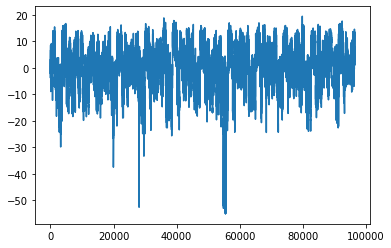

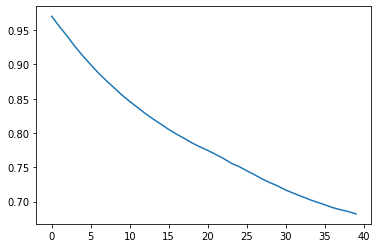

In [32]:
# Assumption 5: error terms should be uncorrelated with one another

plt.plot(errors)
plt.show()
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

# it seems the errors are correlated with each other

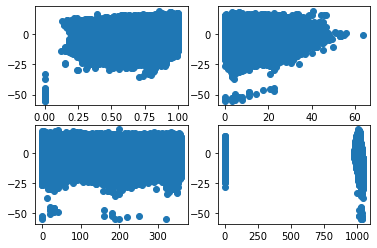

In [37]:
# Assumption six: feature should not be correlated with errors

plt.subplot(2,2,1)
plt.scatter(data['humidity'], errors)
plt.subplot(2,2,2)
plt.scatter(data['windspeed'], errors)
plt.subplot(2,2,3)
plt.scatter(data['windbearing'], errors)
plt.subplot(2,2,4)
plt.scatter(data['pressure'], errors)

# No trend obeserved between features and errors

(array([1.6000e+01, 4.0000e+00, 5.0000e+00, 9.4000e+01, 9.4700e+02,
        7.2360e+03, 2.3924e+04, 3.5743e+04, 2.5853e+04, 2.6310e+03]),
 array([-55.10888311, -47.65438214, -40.19988117, -32.7453802 ,
        -25.29087923, -17.83637826, -10.38187729,  -2.92737632,
          4.52712465,  11.98162562,  19.43612659]),
 <a list of 10 Patch objects>)

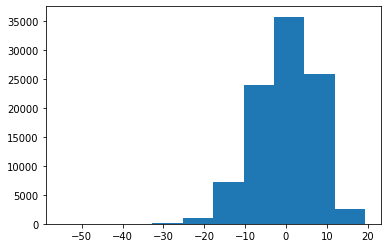

In [34]:
plt.hist(errors)